# Part-2:

### 1.Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

Answer: done

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r"C:\Users\abdul\Career-Foundry-Assignment4-Instacart-Basket-Analysis"

In [3]:
df_ords_prods_cust=pd.read_pickle(os.path.join(path, '02_Data', 'Prepared-Data', 'ords_prods_cust.pkl'))

In [4]:
df_ords_prods_cust.head(5)

Unnamed: 0.1  Unnamed: 0_x  order_id  user_id eval_set  order_number  \
0             0             0   2539329        1    prior             1   
1             1             1   2398795        1    prior             2   
2             2             2    473747        1    prior             3   
3             3             3   2254736        1    prior             4   
4             4             4    431534        1    prior             5   

   order_dow  order_hour_of_day  days_since_prior_order  product_id  ...  \
0          2                  8                     7.0         196  ...   
1          3                  7                    15.0         196  ...   
2          3                 12                    21.0         196  ...   
3          4                  7                    29.0         196  ...   
4          4                 15                    28.0         196  ...   

   First Name  Surnam  Gender    STATE   Age  date_joined  \
0       Linda  Nguyen  Female  Alabama  31.0    2/17/2019   
1       Linda  Nguyen  Female  Alabama  31.0    2/17/2019   
2       Linda  Nguyen  Female  Alabama  31.0    2/17/2019   
3       Linda  Nguyen  Female  Alabama  31.0    2/17/2019   
4       Linda  Nguyen  Female  Alabama  31.0    2/17/2019   

   number_of_dependants family_status   income  _merge  
0                   3.0       married  40423.0    both  
1                   3.0       married  40423.0    both  
2                   3.0       married  40423.0    both  
3                   3.0       married  40423.0    both  
4                   3.0       married  40423.0    both  

[5 rows x 35 columns]

### 2.If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

Answer:done

## 2.1: Bar Chart

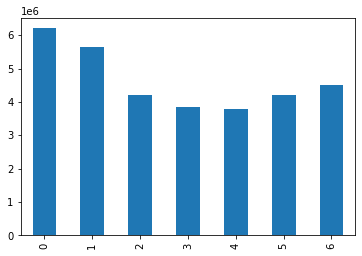

In [5]:
#create a Bar Chart
bar1=df_ords_prods_cust['order_dow'].value_counts().sort_index().plot.bar()

In [6]:
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar1_orders_dow.png'))

### 3.You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
### In a markdown cell beneath your histogram, describe what the histogram demonstrates.

## 2.2: Histogram

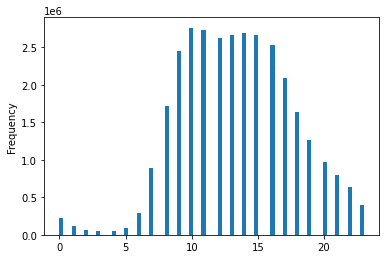

In [7]:
hist1=df_ords_prods_cust['order_hour_of_day'].plot.hist(bins=75)

In [8]:
hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','hist1_order_hour_of_day.png'))

-In the Histogram as shown above, the peak orders are between  9-16 hours. 

## 2.3: Scatter Plots

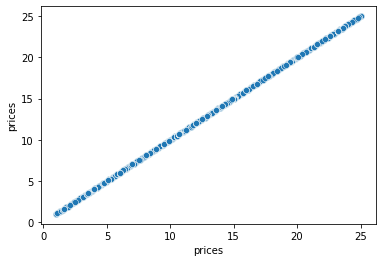

In [9]:
scatter1=sns.scatterplot(x='prices', y='prices', data=df_ords_prods_cust)

In [10]:
scatter1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','scatter1_prices.png'))

### 4.The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

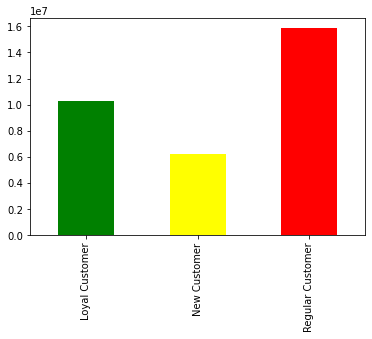

In [11]:
#create a Bar Chart
bar2=df_ords_prods_cust['loyalty_flag'].value_counts().sort_index().plot.bar(color=['green', 'yellow','red'])

In [12]:
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar2_loyalty_flag.png'))

### 5.Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [13]:
np.random.seed(4)
#Create a list holding True/False values to the test np.random.rand()>=0.7
dev=np.random.rand(len(df_ords_prods_cust))<=0.7

In [14]:
dev

array([False,  True, False, ..., False,  True,  True])

In [15]:
# store 70% of the sample in the dataframe big
#big= df_ords_prods_cust[dev]

In [16]:
# store 30% of the sample in the dataframe small
small= df_ords_prods_cust[~dev]

In [17]:
len(df_ords_prods_cust)

32399732

In [18]:
#len(big)

In [19]:
len(small)

9719609

In [20]:
#len(big)+len(small)

In [21]:
df_2=small[['order_hour_of_day', 'prices']]

In [22]:
df_2.shape

(9719609, 2)

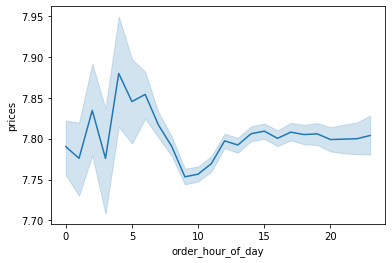

In [23]:
line1= sns.lineplot(data=df_2, x='order_hour_of_day', y='prices')

In [24]:
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','line1_order_hour_of_day_prices.png'))

### 6.Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
### In a markdown cell beneath your line chart, describe what the line chart shows.

In [25]:
df_3=small[['Age', 'family_status', 'number_of_dependants']]

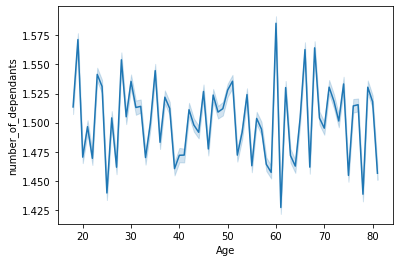

In [26]:
line2= sns.lineplot(data=df_3, x='Age', y='number_of_dependants')

In [27]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','line2_Age_number_of_dependants.png'))

- The Line chart shows the relation between Age and the number of dependents.The graph is chiotic. it is impossible to draw the relationship between the age and number of dependents. 

In [28]:
line3= sns.lineplot(data=df_3, x='family_status', y='Age')

In [29]:
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','line3_Age_family_status.png'))

- The Line chart shows the relation between Age and the family status.The graph shows that divorced/widowed people are in the highest age of 70 years. living with parents and siblings are the lowest age.

### 7.You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

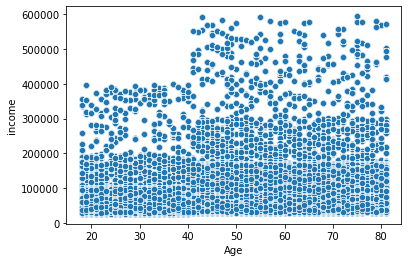

In [30]:
scatter2=sns.scatterplot(x='Age', y='income', data=df_ords_prods_cust)

In [31]:
scatter2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','scatter2_Age_income.png'))

-The scatter plot shows the relationship between the Age and the income. The income, below 40 years is 200k. The Age above 40 years, peoples income is increasing to 600k. 

### 8.Export your visualizations as “.png” files in your relevant project folder.

Answer: yes

### 9. Save your notebook from part 2 of this Exercise’s task.

Answer: done

### 10.Submit your notebooks for both the first and second parts of this task to your tutor for review.

Answer: done